## PyTorch and Autograd (Continued)

In [ ]:
from IPython.display import Image as IPythonImage
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt

# check last lecture, when we introduced the module torch.nn
import torch.nn as nn

In [ ]:
print('PyTorch version:', torch.__version__)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

PyTorch version: 2.5.1+cu124
cpu


In [ ]:
%pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

### Can you perhaps extend this to 2D function in x and y


Consider the equation

$$
f(x, y) = \sin{(x+y)} = Z
$$
where $x,y \in [0., 2\pi]$

This can be broken down to

$$ v = x + y $$
$$ z = \sin{(v)} $$

In `autograd` the tensors `x` and `y` are called as leaves. During the forward pass, if the argument `requires_grad` is set to true, then derivates corresponding to each operations performed using the variable will be traced. This is true for intermediate leaf like the varible `v` as well. But storing the trace can be turned on or off by the argument `retain_grad`. Follow the blog [pytorch-autograd-engine](https://pytorch.org/blog/overview-of-pytorch-autograd-engine/) for more information

![](https://drive.google.com/uc?id=1bB7o16lSObD-Exz9-plMTQsRrxcKDJ1G)




One can verify if all works by doing the following
$$
\begin{align}
\vec{\nabla} f(x, y) &=
\hat{i}\frac{\partial}{\partial x}\sin{(x+y)} + \hat{j} \frac{\partial}{\partial y}\sin{(x + y)}
\end{align}
$$


hence, if we do
$$f^{2} + \frac{1}{2}| \vec{\nabla}f| ^{2} = 1$$


<ipython-input-7-293248364fa6>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
<ipython-input-7-293248364fa6>:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
<ipython-input-7-293248364fa6>:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])


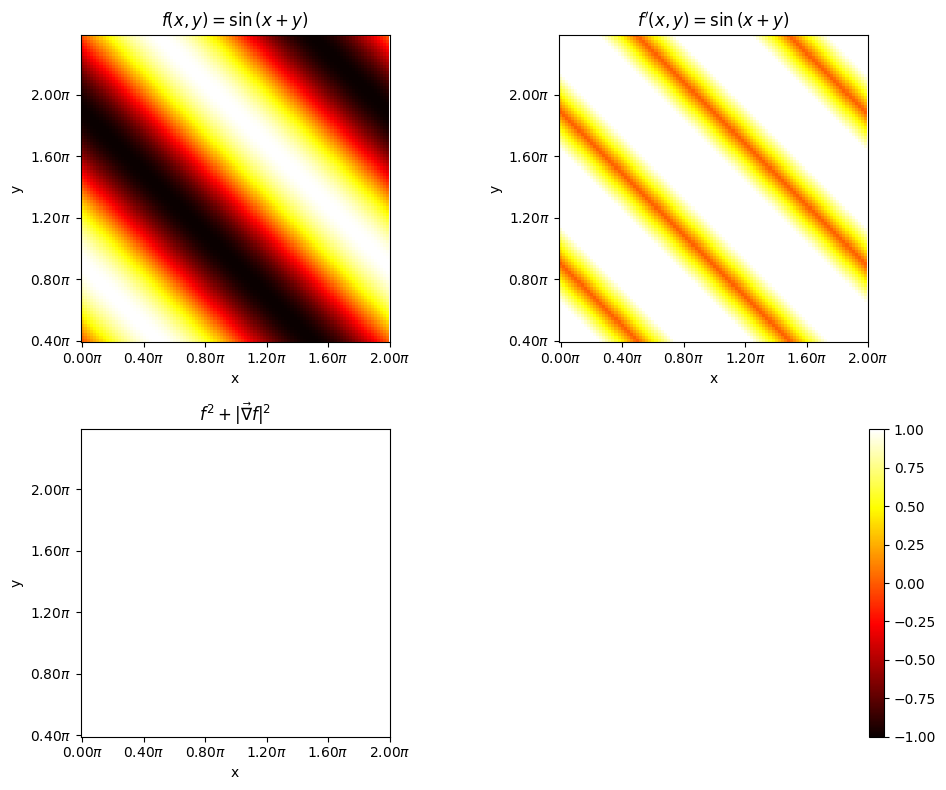

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

tkwargs = {'dtype': torch.float,
           'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')
           }

# create a linspace in x from -5 to 5
x = torch.linspace(0., 2*torch.pi, 100, requires_grad=False, **tkwargs)
y = torch.linspace(0., 2*torch.pi, 100, requires_grad=False, **tkwargs)
X, Y = torch.meshgrid(x, y, indexing = "xy")
X.requires_grad = True
Y.requires_grad = True
V = X + Y
V.retain_grad()

Z = torch.sin(V)
Z.retain_grad()

# Lets compute the gradients
Z.backward(torch.ones_like(Z))

# switch off tracing
with torch.no_grad():
    dz_dx = X.grad
    dz_dy = Y.grad
    # plot imshow first
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    # normalize color to -1 to 1
    f = axes[0, 0].imshow(Z.cpu().numpy(), cmap='hot', vmin=-1, vmax=1, origin = "lower")
    axes[0, 0].set_title(r"$f(x, y) = \sin{(x+y)}$")
    axes[0, 0].set_xlabel('x')
    axes[0, 0].set_ylabel('y')
    # set axis labels to go from 0 to 2pi
    axes[0, 0].set_xticks(np.linspace(0., 100., 6))
    axes[0, 0].set_xticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
    axes[0, 0].set_xticks(np.linspace(0., 100., 6))
    axes[0, 0].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])

    # compute zprime = dz_dx + dz_dy
    Zprime = torch.sqrt(dz_dx**2 + dz_dy**2)
    zprme = axes[0, 1].imshow(Zprime.cpu().numpy(), cmap = 'hot', vmin = -1, vmax = 1, origin = "lower")
    axes[0, 1].set_title(r"$f^{\prime}(x, y) = \sin{(x+y)}$")
    axes[0, 1].set_xlabel('x')
    axes[0, 1].set_ylabel('y')
    # set axis labels to go from 0 to 2pi
    axes[0, 1].set_xticks(np.linspace(0., 100., 6))
    axes[0, 1].set_xticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
    axes[0, 1].set_xticks(np.linspace(0., 100., 6))
    axes[0, 1].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])

    # compute z**2 + 1/4 z**2'
    added = Z**2 + (1/2.)*Zprime**2
    axes[1, 0].imshow(added.cpu().numpy(), cmap = 'hot', vmin = -1, vmax = 1, origin = "lower")
    axes[1, 0].set_title(r"$f^{2} + |\vec{\nabla} f|^{2}$")
    axes[1, 0].set_xlabel('x')
    axes[1, 0].set_ylabel('y')
    # set axis labels to go from 0 to 2pi
    axes[1, 0].set_xticks(np.linspace(0., 100., 6))
    axes[1, 0].set_xticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
    axes[1, 0].set_xticks(np.linspace(0., 100., 6))
    axes[1, 0].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
    #place the color bar on the top of the figure not wihtin any subplots
    axes[1, 1].set_axis_off()
    fig.colorbar(zprme, ax = axes[1, 1], orientation = "vertical")
    plt.tight_layout()
    plt.show()

If $V = X+Y$ then,

$$
\frac{\partial Z}{\partial V} = \frac{\partial \sin{(V)}}{\partial V} = \cos{(V)}
$$

Hence

<ipython-input-8-5f9c4e8aec3a>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
<ipython-input-8-5f9c4e8aec3a>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
<ipython-input-8-5f9c4e8aec3a>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])


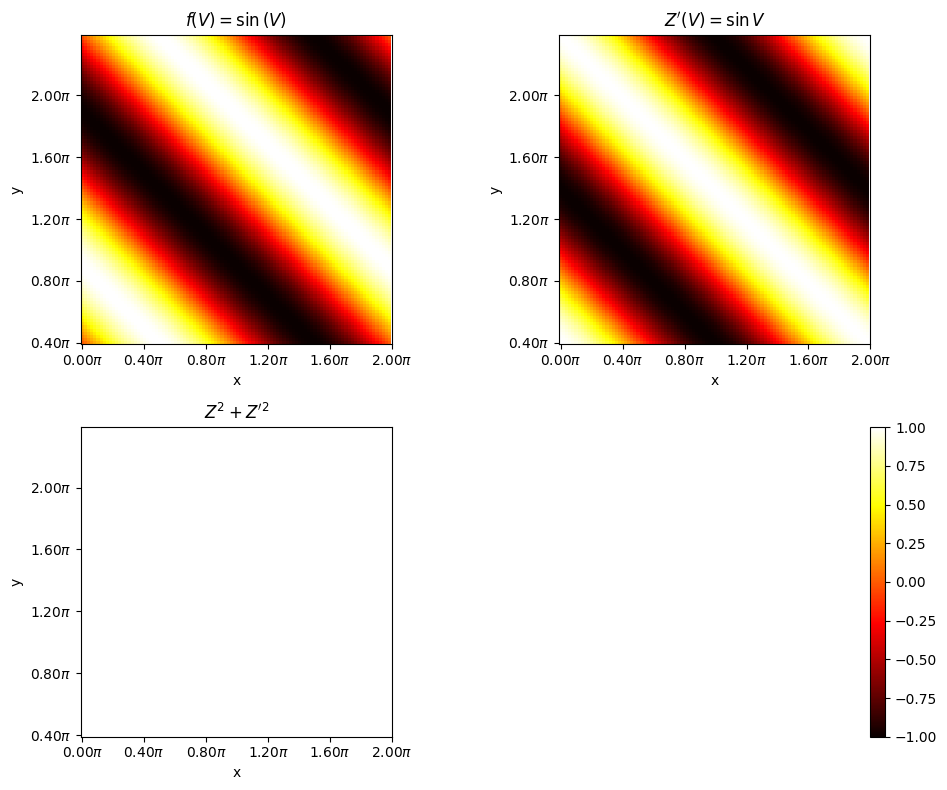

In [ ]:
#@title $Z^{2} + Z^{\prime 2} = 1$

# switch off tracing
with torch.no_grad():
    dz_dx = X.grad
    dz_dy = Y.grad
    # plot imshow first
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    # normalize color to -1 to 1
    f = axes[0, 0].imshow(Z.cpu().numpy(), cmap='hot', vmin=-1, vmax=1, origin = "lower")
    axes[0, 0].set_title(r"$f(V) = \sin{(V)}$")
    axes[0, 0].set_xlabel('x')
    axes[0, 0].set_ylabel('y')
    # set axis labels to go from 0 to 2pi
    axes[0, 0].set_xticks(np.linspace(0., 100., 6))
    axes[0, 0].set_xticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
    axes[0, 0].set_xticks(np.linspace(0., 100., 6))
    axes[0, 0].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])

    # compute zprime = dz_dx + dz_dy
    dz_dv = V.grad
    zprme = axes[0, 1].imshow(dz_dv.cpu().numpy(), cmap = 'hot', vmin = -1, vmax = 1, origin = "lower")
    axes[0, 1].set_title(r"$Z^{\prime}(V) = \sin{V}$")
    axes[0, 1].set_xlabel('x')
    axes[0, 1].set_ylabel('y')
    # set axis labels to go from 0 to 2pi
    axes[0, 1].set_xticks(np.linspace(0., 100., 6))
    axes[0, 1].set_xticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
    axes[0, 1].set_xticks(np.linspace(0., 100., 6))
    axes[0, 1].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])

    # compute z**2 + 1/4 z**2'
    added = Z**2 + Zprime**2
    axes[1, 0].imshow(added.cpu().numpy(), cmap = 'hot', vmin = -1, vmax = 1, origin = "lower")
    axes[1, 0].set_title(r"$Z^{2} + Z^{\prime 2}$")
    axes[1, 0].set_xlabel('x')
    axes[1, 0].set_ylabel('y')
    # set axis labels to go from 0 to 2pi
    axes[1, 0].set_xticks(np.linspace(0., 100., 6))
    axes[1, 0].set_xticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
    axes[1, 0].set_xticks(np.linspace(0., 100., 6))
    axes[1, 0].set_yticklabels([f"{i:.2f}" + r"$\pi$" for i in np.linspace(0., 2., 6)])
    #place the color bar on the top of the figure not wihtin any subplots
    axes[1, 1].set_axis_off()
    fig.colorbar(zprme, ax = axes[1, 1], orientation = "vertical")
    plt.tight_layout()
    plt.show()

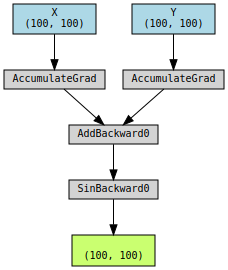

In [ ]:
import torchviz

torchviz.make_dot(Z, {'X': X, 'Y': Y, 'V': V})

### Simplifying implementations via the torch.nn module and models based on nn.Sequential


In [ ]:
model = nn.Sequential(
    nn.Linear(4, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU()
)

model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

#### Configuring layers

 * Initializers `nn.init`: https://pytorch.org/docs/stable/nn.init.html
 * L1 Regularizers `nn.L1Loss`: https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss
 * L2 Regularizers `weight_decay`: https://pytorch.org/docs/stable/optim.html
 * Activations: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity  


In [ ]:
nn.init.xavier_uniform_(model[0].weight)

l1_weight = 0.01
l1_penalty = l1_weight * model[2].weight.abs().sum()


#### Compiling a model

 * Optimizers `torch.optim`:  https://pytorch.org/docs/stable/optim.html#algorithms
 * Loss Functions `tf.keras.losses`: https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Effect of zeroing out gradients


In [ ]:
import torch

# Define a simple linear model: y = wx
w = torch.tensor([2.0], requires_grad=True)  # Initialize weight w
x = torch.tensor([1.0])  # Input value
y_true = torch.tensor([4.0])  # True value (target)

# Define a learning rate
learning_rate = 0.1

# Optimizer (Gradient Descent)
optimizer = torch.optim.SGD([w], lr=learning_rate)

# Define a simple Mean Squared Error (MSE) loss function
def loss_fn(y_pred, y_true):
    return (y_pred - y_true).pow(2).mean()

# Step 1: Forward pass and loss computation
y_pred = w * x
loss = loss_fn(y_pred, y_true)

# Backward pass (compute gradients)
loss.backward()

print(f"Gradients after step 1: {w.grad}")

# Step 2: Update weights without zeroing gradients
optimizer.step()  # This updates w using the gradient

# Forward pass again after the update
y_pred = w * x
loss = loss_fn(y_pred, y_true)

# Compute new gradients
loss.backward()

print(f"Gradients after step 2 without zeroing: {w.grad}")



Gradients after step 1: tensor([-4.])
Gradients after step 2 without zeroing: tensor([-7.2000])


In [ ]:
# Now lets do it the right way

# Reset the weight and gradient
w = torch.tensor([2.0], requires_grad=True)
optimizer = torch.optim.SGD([w], lr=learning_rate)

# Step 1: Forward pass and loss computation
y_pred = w * x
loss = loss_fn(y_pred, y_true)
loss.backward()

print(f"Gradients after step 1: {w.grad}")

# Update weights
optimizer.step()

# Zero the gradients
optimizer.zero_grad()

# Step 2: Forward pass again after zeroing
y_pred = w * x
loss = loss_fn(y_pred, y_true)
loss.backward()

print(f"Gradients after step 2 with zeroing: {w.grad}")


Gradients after step 1: tensor([-4.])
Gradients after step 2 with zeroing: tensor([-3.2000])


### Solving an XOR classification problem

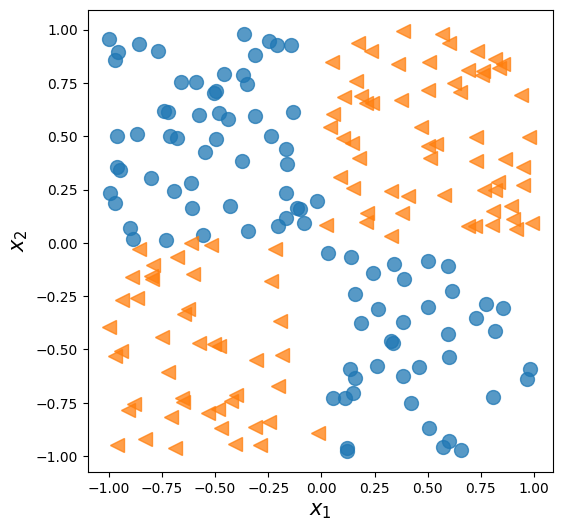

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1)
torch.manual_seed(1)
x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

#plt.savefig('figures/13_02.png', dpi=300)
plt.show()

In [ ]:
from torch.utils.data import DataLoader, TensorDataset


train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [ ]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

model


Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

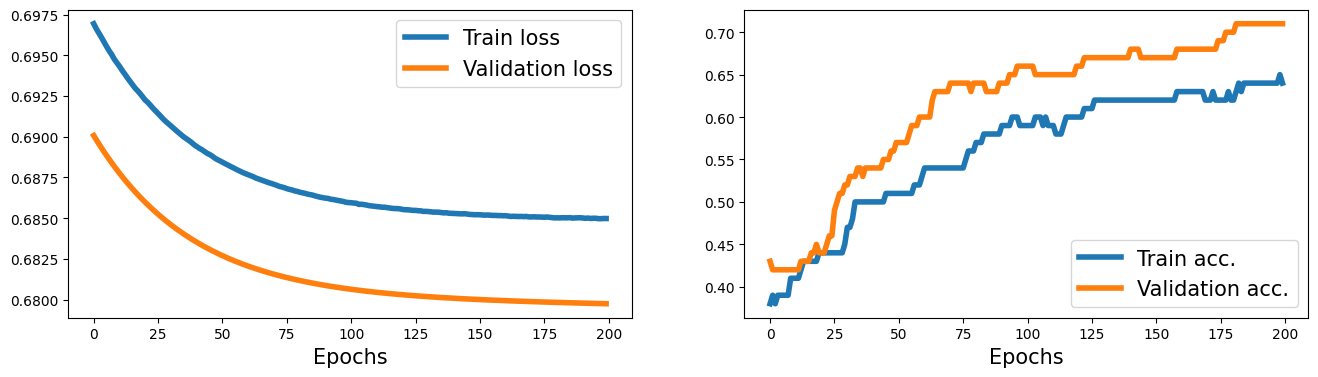

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)



In [ ]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

Text(0.5, 0, 'Epochs')

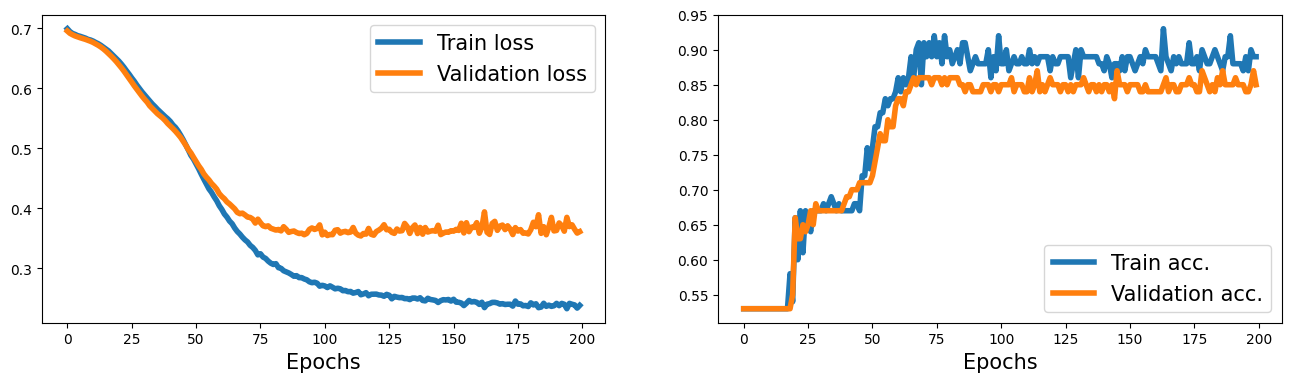

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

#plt.savefig('figures/13_04.png', dpi=300)

### Making model building more flexible with nn.Module



In [ ]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

model = MyModule()
model


MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

# torch.manual_seed(1)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

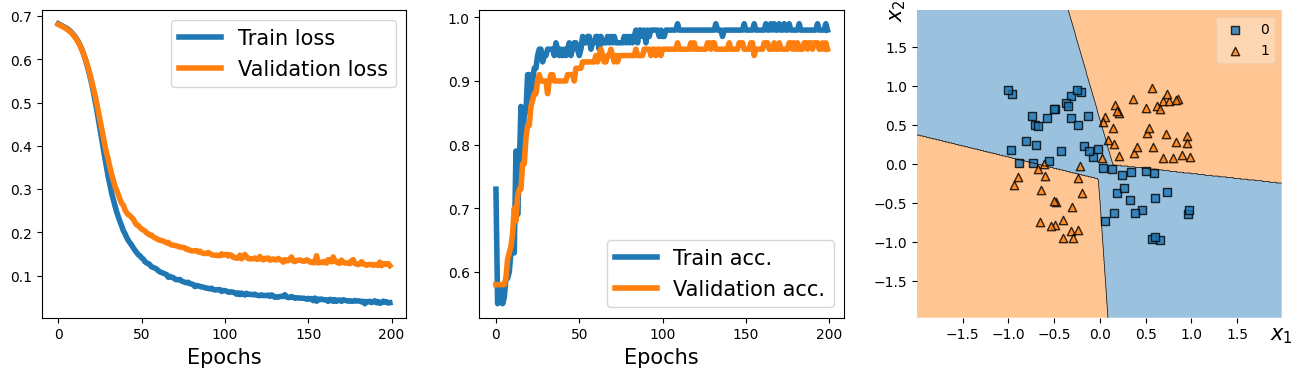

In [ ]:
from mlxtend.plotting import plot_decision_regions # replacing the plot_decision function used in previous lectures


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

#plt.savefig('figures/13_05.png', dpi=300)
plt.show()

### Writing custom layers in PyTorch


In [ ]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev=0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)  # nn.Parameter is a Tensor that's a module parameter.
        nn.init.xavier_uniform_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev

    def forward(self, x, training=False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        return torch.add(torch.mm(x_new, self.w), self.b)

In [ ]:
## testing:

torch.manual_seed(1)

noisy_layer = NoisyLinear(4, 2)

x = torch.zeros((1, 4))
print(noisy_layer(x, training=True))

print(noisy_layer(x, training=True))

print(noisy_layer(x, training=False))


tensor([[ 0.1154, -0.0598]], grad_fn=<AddBackward0>)
tensor([[ 0.0432, -0.0375]], grad_fn=<AddBackward0>)
tensor([[0., 0.]], grad_fn=<AddBackward0>)


In [ ]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()

    def forward(self, x, training=False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x

    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()

torch.manual_seed(1)
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [ ]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

torch.manual_seed(1)

loss_hist_train = [0] * num_epochs
accuracy_hist_train = [0] * num_epochs
loss_hist_valid = [0] * num_epochs
accuracy_hist_valid = [0] * num_epochs
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_hist_train[epoch] += is_correct.mean()

    loss_hist_train[epoch] /= n_train/batch_size
    accuracy_hist_train[epoch] /= n_train/batch_size

    pred = model(x_valid)[:, 0]
    loss = loss_fn(pred, y_valid)
    loss_hist_valid[epoch] = loss.item()
    is_correct = ((pred>=0.5).float() == y_valid).float()
    accuracy_hist_valid[epoch] += is_correct.mean()

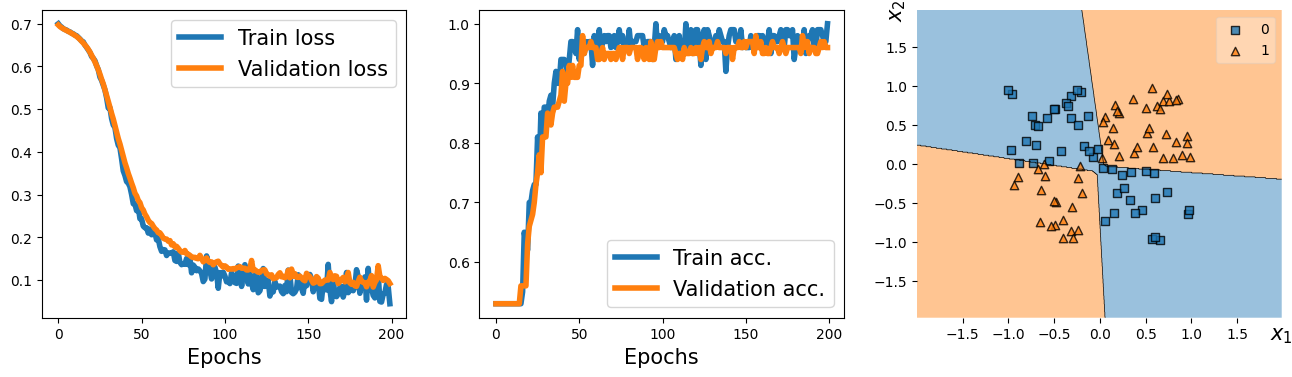

In [ ]:
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(loss_hist_train, lw=4)
plt.plot(loss_hist_valid, lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(accuracy_hist_train, lw=4)
plt.plot(accuracy_hist_valid, lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

plt.show()

### Example 2 - lassifying MNIST hand-written digits

In [ ]:
import torchvision
from torchvision import transforms # used for data preprocessing and augmentation
import torch
from torch.utils.data import DataLoader
from torch import nn
image_path = './'
transform = transforms.Compose([transforms.ToTensor()]) # transforms the images to tensors

mnist_train_dataset = torchvision.datasets.MNIST(root=image_path,
                                           train=True,
                                           transform=transform,
                                           download=True)
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path,
                                           train=False,
                                           transform=transform,
                                           download=False)

batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.4MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 342kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.20MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.26MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
hidden_units = [32, 16]
image_size = mnist_train_dataset[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]

all_layers = [nn.Flatten()]
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size = hidden_unit

all_layers.append(nn.Linear(hidden_units[-1], 10))
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

torch.manual_seed(1)
num_epochs = 20
for epoch in range(num_epochs):
    accuracy_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_train += is_correct.sum()
    accuracy_hist_train /= len(train_dl.dataset)
    print(f'Epoch {epoch}  Accuracy {accuracy_hist_train:.4f}')

Epoch 0  Accuracy 0.8531
Epoch 1  Accuracy 0.9287
